# Classification of Genus Papaver #

Papaver is a genus of 70–100 species of frost-tolerant native to temperate and cold regions of Eurasia, Africa and North America. It is the type genus of the poppy family, Papaveraceae.<br>
We will train a classification model (as part of machine learning) to identify the four different Papaver species based on the characteristics (aka features) of their capsules.

<figure>
<img src="./assets/img/Genus-Papaver-Labelled.jpg" alt="Genus Papaver Labelled" width="600">
<figcaption>Fig.1: Poppy (papaver) capsules. From left to right: p. somniferum , p. orientale , p. dubium , p. rhoeas</figcaption>
</figure>
<p>
<p>
<figure>
<img src="./assets/img/1024px-Opium_poppy.jpg" alt="Opium poppy" width="400">
<figcaption>Fig. 2: papaver somniferum (opium poppy).</figcaption>
</figure>

Source: [Wikimedia](https://commons.wikimedia.org/wiki/File:Opium_poppy.jpg)


In [1]:
import pandas as pd

In [2]:
#import matplotlib.pyplot as plt

In [3]:
poppy_df = pd.read_csv("data/poppy_capsules.csv",skiprows=4, index_col=["specimen no."])

In [4]:
poppy_df

,set,species no.,species name,capsule length [mm],capsule width [mm],ratio length to width,mean value of ratio,standard deviation,stalk thickness [mm],cap diameter [mm],stalk hair present (Y/N),stalk hair appressed (Y/N)
specimen no.,,,,,,,,,,,,
1,A,1,Papaver somniferum,26.34,19.50,1.35077,1.27063,0.11333,3.35,16.56,N,N
2,A,1,Papaver somniferum,24.56,20.63,1.19050,1.27063,0.11333,3.08,16.68,N,N
3,A,2,Papaver orientale,25.49,19.97,1.27641,1.21133,0.07751,4.94,22.14,Y,Y
4,A,2,Papaver orientale,20.05,15.74,1.27382,1.21133,0.07751,4.29,19.26,Y,Y
5,A,2,Papaver orientale,18.81,15.98,1.17710,1.21133,0.07751,3.75,17.79,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
146,E,4,Papaver rhoeas,14.28,10.26,1.39181,1.50509,0.26474,2.48,8.90,Y,N
147,E,4,Papaver rhoeas,11.64,9.40,1.23830,1.50509,0.26474,1.07,9.22,Y,N
148,E,4,Papaver rhoeas,15.55,7.74,2.00904,1.50509,0.26474,1.67,10.06,Y,N


In [5]:
poppy_df[["species name","capsule length [mm]" ,
                        "capsule width [mm]" , "stalk thickness [mm]" ,"cap diameter [mm]"]]

,species name,capsule length [mm],capsule width [mm],stalk thickness [mm],cap diameter [mm]
specimen no.,,,,,
1,Papaver somniferum,26.34,19.50,3.35,16.56
2,Papaver somniferum,24.56,20.63,3.08,16.68
3,Papaver orientale,25.49,19.97,4.94,22.14
4,Papaver orientale,20.05,15.74,4.29,19.26
5,Papaver orientale,18.81,15.98,3.75,17.79
...,...,...,...,...,...
146,Papaver rhoeas,14.28,10.26,2.48,8.90
147,Papaver rhoeas,11.64,9.40,1.07,9.22
148,Papaver rhoeas,15.55,7.74,1.67,10.06


### Filter or Slice Data Frame

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.filter.html

In [6]:
df = poppy_df.filter(["species name","capsule length [mm]" ,
                      "capsule width [mm]" , "stalk thickness [mm]" ,"cap diameter [mm]"])
df.head()

,species name,capsule length [mm],capsule width [mm],stalk thickness [mm],cap diameter [mm]
specimen no.,,,,,
1,Papaver somniferum,26.34,19.50,3.35,16.56
2,Papaver somniferum,24.56,20.63,3.08,16.68
3,Papaver orientale,25.49,19.97,4.94,22.14
4,Papaver orientale,20.05,15.74,4.29,19.26
5,Papaver orientale,18.81,15.98,3.75,17.79


In [7]:
df2 = poppy_df[["species name","capsule length [mm]",
                "capsule width [mm]","stalk thickness [mm]","cap diameter [mm]"]]
df2.head()

,species name,capsule length [mm],capsule width [mm],stalk thickness [mm],cap diameter [mm]
specimen no.,,,,,
1,Papaver somniferum,26.34,19.50,3.35,16.56
2,Papaver somniferum,24.56,20.63,3.08,16.68
3,Papaver orientale,25.49,19.97,4.94,22.14
4,Papaver orientale,20.05,15.74,4.29,19.26
5,Papaver orientale,18.81,15.98,3.75,17.79


In [8]:
import seaborn as sns            # sophisticated data plotting library

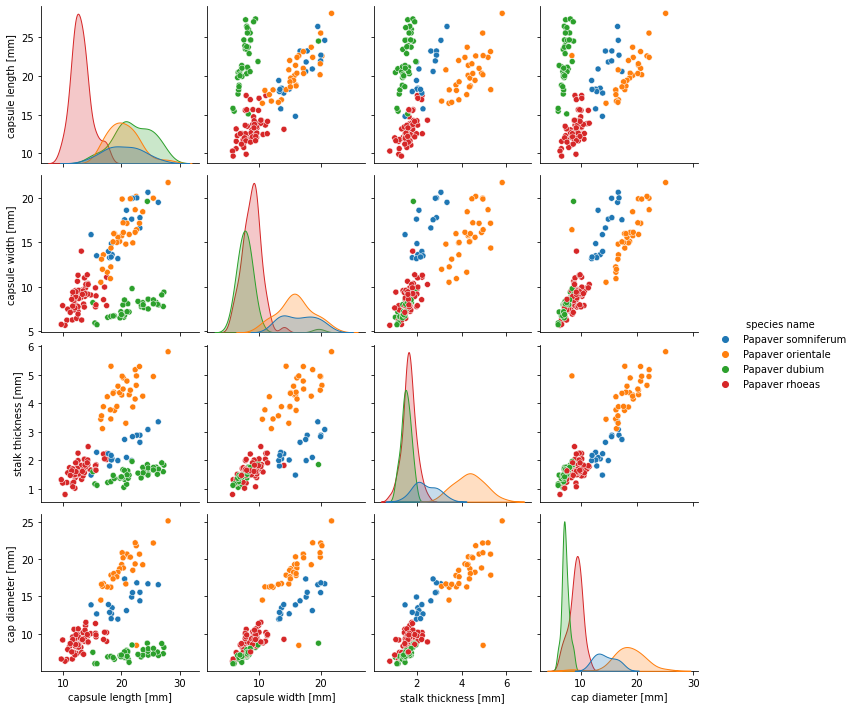

In [9]:
# fig1, ax1 = plt.subplots(figsize=(6,6), dpi = 150)
sns.pairplot(df,hue="species name",height=2.5) # plot function to automatically plot a pairplot scatter graph

### Rename Columns

https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

In [10]:
# old_cols = df.columns
old_cols = df.columns.to_list()
old_cols

['species name',
 'capsule length [mm]',
 'capsule width [mm]',
 'stalk thickness [mm]',
 'cap diameter [mm]']

In [11]:
new_cols = ["Spec", "L", "W", "T", "D"]
new_cols

['Spec', 'L', 'W', 'T', 'D']

In [12]:
# Dictionary
translate = {
    'species name' : 'Spec',
    'capsule length [mm]' : 'L', 
    'capsule width [mm]' : 'W',
    'stalk thickness [mm]' : 'T', 
    'cap diameter [mm]' : 'D'
}
translate

{'species name': 'Spec',
 'capsule length [mm]': 'L',
 'capsule width [mm]': 'W',
 'stalk thickness [mm]': 'T',
 'cap diameter [mm]': 'D'}

In [13]:
translate2 = {}
for k,v in zip(old_cols,new_cols):
    print(k,":",v)
    translate2[k] = v
    
translate2

species name : Spec
capsule length [mm] : L
capsule width [mm] : W
stalk thickness [mm] : T
cap diameter [mm] : D


{'species name': 'Spec',
 'capsule length [mm]': 'L',
 'capsule width [mm]': 'W',
 'stalk thickness [mm]': 'T',
 'cap diameter [mm]': 'D'}

In [14]:
ren_idx = {'specimen no.' : 'item'}

In [15]:
df.rename(translate, axis = "columns")

,Spec,L,W,T,D
specimen no.,,,,,
1,Papaver somniferum,26.34,19.50,3.35,16.56
2,Papaver somniferum,24.56,20.63,3.08,16.68
3,Papaver orientale,25.49,19.97,4.94,22.14
4,Papaver orientale,20.05,15.74,4.29,19.26
5,Papaver orientale,18.81,15.98,3.75,17.79
...,...,...,...,...,...
146,Papaver rhoeas,14.28,10.26,2.48,8.90
147,Papaver rhoeas,11.64,9.40,1.07,9.22
148,Papaver rhoeas,15.55,7.74,1.67,10.06


In [16]:
df.head()

,species name,capsule length [mm],capsule width [mm],stalk thickness [mm],cap diameter [mm]
specimen no.,,,,,
1,Papaver somniferum,26.34,19.50,3.35,16.56
2,Papaver somniferum,24.56,20.63,3.08,16.68
3,Papaver orientale,25.49,19.97,4.94,22.14
4,Papaver orientale,20.05,15.74,4.29,19.26
5,Papaver orientale,18.81,15.98,3.75,17.79


In [17]:
df.rename(translate, axis = "columns", inplace = True)
df.index.name = "item"
df.head()

,Spec,L,W,T,D
item,,,,,
1,Papaver somniferum,26.34,19.50,3.35,16.56
2,Papaver somniferum,24.56,20.63,3.08,16.68
3,Papaver orientale,25.49,19.97,4.94,22.14
4,Papaver orientale,20.05,15.74,4.29,19.26
5,Papaver orientale,18.81,15.98,3.75,17.79


In [18]:
df["Spec"] = df["Spec"].str.replace("Papaver","p.")
df.head()

,Spec,L,W,T,D
item,,,,,
1,p. somniferum,26.34,19.50,3.35,16.56
2,p. somniferum,24.56,20.63,3.08,16.68
3,p. orientale,25.49,19.97,4.94,22.14
4,p. orientale,20.05,15.74,4.29,19.26
5,p. orientale,18.81,15.98,3.75,17.79


In [19]:
df

,Spec,L,W,T,D
item,,,,,
1,p. somniferum,26.34,19.50,3.35,16.56
2,p. somniferum,24.56,20.63,3.08,16.68
3,p. orientale,25.49,19.97,4.94,22.14
4,p. orientale,20.05,15.74,4.29,19.26
5,p. orientale,18.81,15.98,3.75,17.79
...,...,...,...,...,...
146,p. rhoeas,14.28,10.26,2.48,8.90
147,p. rhoeas,11.64,9.40,1.07,9.22
148,p. rhoeas,15.55,7.74,1.67,10.06


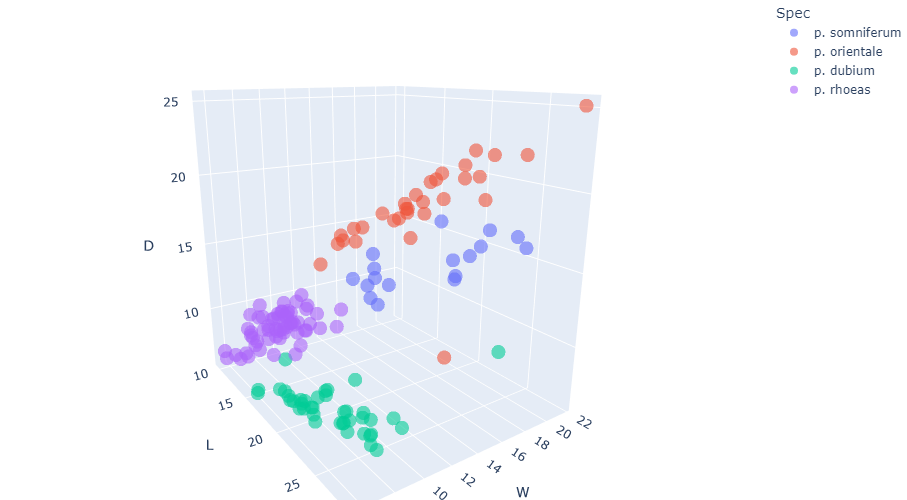

In [29]:
import plotly.express as px

fig = px.scatter_3d(df, x="L", y="W", z="D", color="Spec", opacity=0.6)
fig.update_layout(margin=dict(l=0,r =0, b=0, t=0), width=800, height=500)
fig.show()

In [21]:
from sklearn.model_selection import train_test_split #import all the relevant modules required 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn import svm,datasets 
from sklearn.utils.multiclass import unique_labels

In [22]:
df["Spec"].unique()

array(['p. somniferum', 'p. orientale', 'p. dubium', 'p. rhoeas'],
      dtype=object)

In [23]:
X = df[["L","W","T","D"]]
Y = df["Spec"]

In [24]:
X_train, X_test , Y_train , Y_test = train_test_split(X , Y , random_state = 0, test_size = 0.4)

In [25]:
# Feature scaling

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [26]:
# Define the model : Init K-NN

classifier = KNeighborsClassifier(n_neighbors = 11 , p = 4 , metric = 'euclidean' )
classifier.fit(X_train,Y_train)

# Define the no.of neighbours as 4 and the measured distance to be the euclidian distance

KNeighborsClassifier(metric='euclidean', n_neighbors=11, p=4)

In [27]:
#predict the test set results 

Y_pred = classifier.predict(X_test)
Y_pred

array(['p. rhoeas', 'p. orientale', 'p. somniferum', 'p. dubium',
       'p. dubium', 'p. orientale', 'p. dubium', 'p. rhoeas', 'p. dubium',
       'p. orientale', 'p. dubium', 'p. rhoeas', 'p. dubium', 'p. rhoeas',
       'p. somniferum', 'p. orientale', 'p. dubium', 'p. somniferum',
       'p. dubium', 'p. rhoeas', 'p. somniferum', 'p. orientale',
       'p. rhoeas', 'p. dubium', 'p. orientale', 'p. rhoeas', 'p. dubium',
       'p. orientale', 'p. orientale', 'p. rhoeas', 'p. dubium',
       'p. rhoeas', 'p. rhoeas', 'p. orientale', 'p. dubium', 'p. rhoeas',
       'p. rhoeas', 'p. rhoeas', 'p. somniferum', 'p. rhoeas',
       'p. rhoeas', 'p. orientale', 'p. rhoeas', 'p. dubium', 'p. dubium',
       'p. somniferum', 'p. rhoeas', 'p. rhoeas', 'p. rhoeas',
       'p. rhoeas', 'p. orientale', 'p. dubium', 'p. dubium', 'p. rhoeas',
       'p. orientale', 'p. dubium', 'p. dubium', 'p. rhoeas', 'p. rhoeas',
       'p. rhoeas'], dtype=object)

In [30]:
import matplotlib.pyplot as plt

[Text(0, 0.5, 'P.Somniferum'),
 Text(0, 1.5, 'P.Orientale'),
 Text(0, 2.5, 'P.Dubium'),
 Text(0, 3.5, 'P.Rhoeas')]

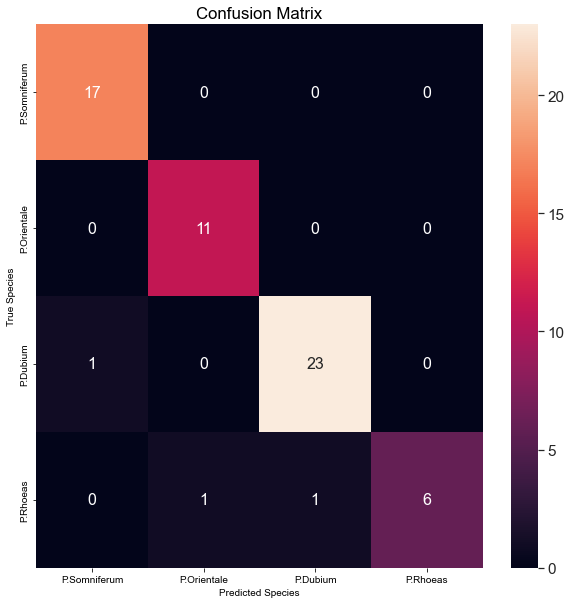

In [31]:
# Plot our confusion matrix as a heatmap using seaborn
cm = confusion_matrix(Y_test,Y_pred)
df_cm = pd.DataFrame(cm, range(4), range(4))
plt.figure(figsize=(10,10))
ax = plt.subplot()
sns.set(font_scale=1.4,)
sns.heatmap(df_cm, annot=True,ax = ax, annot_kws={"size": 16},)
ax.set_xlabel('Predicted Species') ; ax.set_ylabel('True Species')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['P.Somniferum','P.Orientale','P.Dubium','P.Rhoeas'])
ax.yaxis.set_ticklabels(['P.Somniferum','P.Orientale','P.Dubium','P.Rhoeas'])